In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from surprise import Dataset
# from surprise import Reader
# from surprise.model_selection import cross_validate
# from surprise.model_selection import GridSearchCV
# from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
# from surprise import SVD, SVDpp, NMF
# from surprise import SlopeOne, CoClustering

rating = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [2]:
display(rating.head())

,userId,productId,rating
0,15905.0,452609,5.0
1,94522.0,452609,5.0
2,317087.0,452609,5.0
3,1329103.0,452609,5.0
4,502593.0,452609,5.0


In [3]:
display(rating.describe())

,userId,productId,rating
count,7.202839e+06,7.202921e+06,7.202920e+06
mean,3.368837e+05,2.651382e+05,4.277313e+00
std,3.619076e+05,1.525959e+05,1.060728e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.653000e+04,1.331870e+05,4.000000e+00
50%,1.915990e+05,2.667810e+05,5.000000e+00
75%,5.283595e+05,3.965950e+05,5.000000e+00
max,1.424594e+06,5.256180e+05,5.000000e+00


In [4]:
print('No. of Unique Users    :', rating.userId.nunique())
print('No. of Unique Products :', rating.productId.nunique())
print('No. of Unique Ratings  :', rating.rating.nunique())

No. of Unique Users    : 1424595
No. of Unique Products : 525619
No. of Unique Ratings  : 6


In [5]:
ratingViaUserCount = rating.groupby(by=['rating']).agg({'userId': 'count'}).reset_index()
ratingViaUserCount.columns = ['rating', 'Count']

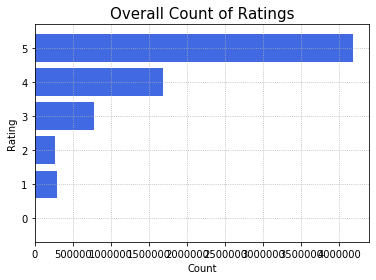

,rating,Count
0,0.0,1
1,1.0,293748
2,2.0,261960
3,3.0,781982
4,4.0,1680574


In [6]:
plt.barh(ratingViaUserCount.rating, ratingViaUserCount.Count, color='royalblue')
plt.title('Overall Count of Ratings', fontsize=15)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.grid(ls='dotted')
plt.show()
display(ratingViaUserCount.head())

In [7]:
userRatingCount = rating['userId'].value_counts();
ratingFiltered = rating[rating['userId'].isin(userRatingCount[userRatingCount >= 50 ].index)]
print(ratingFiltered.shape)
print(rating.shape)
productRatingCount = rating['productId'].value_counts();
ratingFiltered = ratingFiltered[ratingFiltered['userId'].isin(productRatingCount[productRatingCount >= 100 ].index)]
print(ratingFiltered.shape)

(1847803, 3)
(7202921, 3)
(35024, 3)


In [8]:
# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(ratingFiltered[['userId', 'productId', 'rating']], reader)

In [9]:
display(products.sample(10))
display(ratingFiltered.sample(10))
display(ratingFiltered.shape)

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
394045,Tanked Racing 坦克T112-WF 带围脖防雾镜片 摩托车头盔 全盔(黑色 雷 ...,"57,918,46",57,其他,918,汽车用品,46.0,摩托车相关
71013,凯仕达 秋冬新款热卖 棉衣单衣KD11602-1,"1111,942,446",1111,运动户外,942,运动服装,446.0,运动棉衣/羽绒服
338268,杜兰特和斯隆,"832,519,402",832,图书音像,519,文学艺术,402.0,青春文学
429090,普通高中课程标准实验教科书:语文选修????语言文字应用读本,"832,1101,374",832,图书音像,1101,少儿/教育图书,374.0,中小学教辅
306001,撒哈拉沙漠求生记,"832,519,164",832,图书音像,519,文学艺术,164.0,动漫/幽默
434010,成功通过PMP(第2版),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
131432,Lily 复古巴洛克风落肩七分袖T恤衫 女式 113130A820,"802,681,308",802,服饰服装,681,女装,308.0,T恤/打底衫
245462,绘画与表演:中国绘画叙事及其起源研究,"832,519,599",832,图书音像,519,文学艺术,599.0,文学类
4807,现代政治经济学新编系列教材:现代政治经济学新编习题集(第4版),"832,1101,379",832,图书音像,1101,少儿/教育图书,379.0,教材


,userId,productId,rating
3002595,21893.0,165852,3.0
1692504,22785.0,227386,4.0
613644,27211.0,366454,4.0
1548944,3204.0,144342,5.0
4748121,7621.0,249669,4.0
4278399,7811.0,393798,3.0
5061518,104694.0,352021,5.0
4881608,3305.0,121078,5.0
6225417,7621.0,8182,3.0
6619796,5693.0,297881,5.0


(35024, 3)

In [10]:
ratingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
ratingFilteredPivot = ratingFiltered.pivot( index='userId' , columns='productId' , values="rating" ).fillna(0)

In [11]:
print('No. of Unique Users    :', ratingFiltered.userId.nunique())
print('No. of Unique Products :', ratingFiltered.productId.nunique())
print('No. of Unique Ratings  :', ratingFiltered.rating.nunique())
print(products.iloc[1].product_name)
print(ratingFiltered.iloc[0].userId)
print(ratingFiltered.loc[198])
print(ratingFiltered.index.get_loc(198))
display(ratingFilteredPivot.sample(10))
display(ratingFilteredPivot.iloc[0].name)

No. of Unique Users    : 241
No. of Unique Products : 22683
No. of Unique Ratings  : 5
Treasure Island
56597.0
userId        56597.0
productId    452639.0
rating            3.0
Name: 198, dtype: float64
0


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
104694.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72299.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


47.0

In [12]:
productJoinEdRaiting = pd.merge(products, ratingFiltered, on='productId', how='inner')

In [13]:
display(productJoinEdRaiting.sample(10))

,productId,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name,userId,rating
9676,149593,沉思录大全集(超值白金版),"832,723,396",832,图书音像,723,人文社科类图书,396.0,哲学/宗教,858.0,4.0
17762,277826,淘宝网开店、装修、管理、推广一册通(第2版),"832,665,72",832,图书音像,665,生活类图书,72.0,家庭/家居,15596.0,5.0
6039,92498,Nike 耐克 跑步系列男子NIKE LUNARGLIDE+ 4 SHIELD跑步鞋 537475,"518,884,460",518,鞋类箱包,884,运动鞋,460.0,跑步鞋,7812.0,5.0
15261,238234,遇见心想事成的自己(附《心想事成三十天实践手册》1本),"832,151,305",832,图书音像,151,经管类图书,305.0,成功/励志,150456.0,5.0
7906,122083,大豪实木衣架DHSY-819,"571,1058,907",571,家具/家装/建材,1058,家具,907.0,架类,3831.0,2.0
24542,383148,呼兰河传,"832,519,1",832,图书音像,519,文学艺术,1.0,小说,83601.0,4.0
30342,468287,NAMOU 苹果ipad mini大嘴猴保护套 ipad mini保护套真皮质感 ipad ...,"1128,823,1122",1128,手机/数码,823,数码配件,1122.0,iPad配件,55193.0,3.0
4144,62295,郁美净鲜奶润白洁面乳 玫瑰精油型120g,"916,451,406",916,美妆个护,451,面部护理,406.0,洁面,104283.0,5.0
22199,350320,七色狐注音读物:一年级的小朵朵(注音????全彩色????美绘版),"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿,57895.0,5.0
2136,29738,SanDisk 闪迪 microSDHC Class10 32GB至尊高速移动存储卡 UHS...,"1057,268,902",1057,电脑/办公,268,存储设备,902.0,存储卡,154224.0,4.0


In [14]:
ratingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
ratingFilteredPivot = ratingFiltered.pivot( index='userId' , columns='productId' , values="rating" ).fillna(0)

In [16]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    similarities, indices=findksimilarusers(user_id, ratings,metric, k)
     #similar users based on cosine similarity
    mean_rating = ratings.loc[user_id-1,:].mean() 
     #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_id-1]
            -np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print '\nPredicted rating for user {0} -> item {1}: {2}'.
    format(user_id,item_id,prediction)

    return prediction

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('\nPredicted rating for user {0} -> item {1}: {2}'.)? (<ipython-input-16-54b4a7e27c6c>, line 21)

In [15]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
#user based:
raitingFilteredMatrix = csr_matrix(ratingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

#119->userId
#114416 , 3400 , 17750 ,83601 => 0.7
# 127020.0 => 0.3
# 127579.0 => 0.3
queryIndex = ratingFilteredPivot.index.get_loc(127020)
# queryIndex = np.random.choice(ratingFilteredPivot.shape[0])
distances, indices = model_knn.kneighbors(ratingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)

print('Recommendations for User({0}) :\n'.format( ratingFilteredPivot.iloc[queryIndex].name ))

for i in range(0, len(distances.flatten())):
      print('{0}: User({1}) , with distance of {2}:'.format(i, 
                                                            ratingFilteredPivot.iloc[indices.flatten()[i]].name,
                                                            distances.flatten()[i]))
        
# prediction=0
# similarities = 1-distances.flatten()
# display(similarities)
# mean_rating = ratingFilteredPivot.iloc[queryIndex, :].mean() 
# # sum_wt = np.sum(similarities)-1
# sum_wt = np.sum(similarities)
# product=1
# wtd_sum = 0 

# for i in range(0, len(indices.flatten())):
#     if i == 0:
#         pass;
#     else: 
#         ratings_diff = ratingFilteredPivot.iloc[indices.flatten()[i],item_id-1] 
#         - np.mean(ratings.iloc[indices.flatten()[i],:])
#         product = ratings_diff * (similarities[i])
#         wtd_sum = wtd_sum + product
# prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
# print '\nPredicted rating for user {0} -> item {1}: {2}'.
# format(user_id,item_id,prediction)

# for i in range(0, len(indices.flatten())):
#     if i == 0:
#         pass;
#     else: 
#         ratings_diff = ratingFilteredPivot.iloc[indices.flatten()[i],item_id-1] 
#         - np.mean(ratings.iloc[indices.flatten()[i],:])
#         product = ratings_diff * (similarities[i])
#         wtd_sum = wtd_sum + product
# prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
# print ('\nPredicted rating for user {0} -> item {1}: {2}'.
# format(user_id,item_id,prediction))

Recommendations for User(127020.0) :

0: User(127020.0) , with distance of 0.0:
1: User(127579.0) , with distance of 0.32522736007593467:
2: User(6267.0) , with distance of 0.4229442986221119:
3: User(12195.0) , with distance of 0.5992337220460817:
4: User(48026.0) , with distance of 0.6128328059331198:
5: User(35965.0) , with distance of 0.6626272956018002:


In [176]:
prediction=0
similarities = 1-distances.flatten()
sum_wt = np.sum(similarities)
wtd_sum = 0 

tempUserId = 7488
notRatedItems = np.setdiff1d(ratingFilteredPivot.columns.to_numpy() , ratingFilteredPivot[ (ratingFilteredPivot.index == tempUserId) ].iloc[0].nonzero()[0] )
simArray = np.array([similarities]).T * ratingFilteredPivot.ix[indices.flatten()].filter(notRatedItems.tolist()).to_numpy()

sortedIndex = (simArray.sum(axis=0)/sum_wt).argsort()[::-1][:10]
for index , productId in enumerate(sortedIndex.tolist()):
    print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
                                                                                           tempUserId,
                                                                                           notRatedItems[productId],
                                                                                           products.iloc[notRatedItems[productId]].product_name,
                                                                                           products.iloc[notRatedItems[productId]].cat1_name,
                                                                                           products.iloc[notRatedItems[productId]].cat2_name,
                                                                                           products.iloc[notRatedItems[productId]].cat3_name ))


# predictionOfNotRateItems = []
# for item in notRatedItems.tolist():
#     weightedRatingSum = 0
#     for i in range(0, len(indices.flatten())):
#         ratingUserToItem = ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item] * similarities[i]
#         weightedRatingSum += ratingUserToItem
#     predictionOfNotRateItems.append(int(round( weightedRatingSum/sum_wt)))
    
# predictionOfNotRateItems = np.array(predictionOfNotRateItems)
# sortedIndex = predictionOfNotRateItems.argsort()[::-1][:10]
# print(predictionOfNotRateItems)

# for index , productId in enumerate(sortedIndex.tolist()):
#     print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
#                                                                                            tempUserId,
#                                                                                            notRatedItems[productId],
#                                                                                            products.iloc[notRatedItems[productId]].product_name,
#                                                                                            products.iloc[notRatedItems[productId]].cat1_name,
#                                                                                            products.iloc[notRatedItems[productId]].cat2_name,
#                                                                                            products.iloc[notRatedItems[productId]].cat3_name ))

# for index , productId in enumerate(sortedIndex.tolist()):
#     print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
#                                                                        tempUserId,
#                                                                                            productId,
#                                                                         products.iloc[productId].product_name,
#                                                                        products.iloc[productId].cat1_name,
#                                                                        products.iloc[productId].cat2_name,
#                                                                        products.iloc[productId].cat3_name ))

(0). Prediction of User(7488): ProductId(140482) 三国演义 ( 140482 | 文学艺术 | 小说 ):
(1). Prediction of User(7488): ProductId(63040) 三国演义 ( 63040 | 文学艺术 | 小说 ):
(2). Prediction of User(7488): ProductId(121795) 三国演义 ( 121795 | 文学艺术 | 小说 ):
(3). Prediction of User(7488): ProductId(75596) 三国演义 ( 75596 | 文学艺术 | 小说 ):
(4). Prediction of User(7488): ProductId(364792) 三国演义 ( 364792 | 文学艺术 | 小说 ):
(5). Prediction of User(7488): ProductId(249344) 三国演义 ( 249344 | 少儿/教育图书 | 少儿 ):
(6). Prediction of User(7488): ProductId(12510) 三国演义 ( 12510 | 文学艺术 | 小说 ):
(7). Prediction of User(7488): ProductId(262020) 三国演义 ( 262020 | 文学艺术 | 小说 ):
(8). Prediction of User(7488): ProductId(344473) 三国演义 ( 344473 | 少儿/教育图书 | 中小学教辅 ):
(9). Prediction of User(7488): ProductId(427323) 三国演义 ( 427323 | 文学艺术 | 小说 ):


D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  import sys
D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [120]:
# display(ratingFilteredPivot[ratingFilteredPivot.iloc[0].name == 127579.0 ])
# display(ratingFilteredPivot[ratingFilteredPivot.index ==  127579])
# display(ratingFilteredPivot[ratingFilteredPivot.index ==  127020])

display(ratingFiltered[ (ratingFiltered.userId == 6267)  ].head(50))

,userId,productId,rating
238310,6267.0,306453,5.0
524286,6267.0,45778,5.0
578877,6267.0,49616,4.0
587558,6267.0,364792,5.0
668800,6267.0,370499,5.0
807478,6267.0,379192,5.0
843684,6267.0,381668,4.0
951562,6267.0,111166,4.0
953508,6267.0,111239,4.0
954564,6267.0,111300,5.0


In [86]:
def findGood(userId):
    queryIndex = ratingFilteredPivot.index.get_loc(userId)
    # queryIndex = np.random.choice(ratingFilteredPivot.shape[0])
    distances, indices = model_knn.kneighbors(ratingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)
    if distances.flatten()[1] < 0.4:
        print(str(ratingFilteredPivot.iloc[queryIndex].name))
#     for i in range(0, len(distances.flatten())):
#           print('{0}: User({1}) , with distance of {2}:'.format(i, 
#                                                                 ratingFilteredPivot.iloc[indices.flatten()[i]].name,
#                                                                 distances.flatten()[i]))   

In [88]:
# display(ratingFilteredPivot.index[0])
# display(ratingFilteredPivot.head())
# print(type(ratingFilteredPivot.index.values.tolist()))
for i in ratingFilteredPivot.index.values.tolist():
    findGood(i)

127020.0
127579.0


In [32]:
display(ratingFilteredPivot.loc[127020])

productId
4         0.0
11        0.0
24        0.0
31        0.0
47        0.0
54        0.0
115       0.0
119       0.0
176       0.0
180       0.0
226       0.0
240       0.0
270       0.0
273       0.0
280       0.0
322       0.0
360       0.0
391       0.0
421       0.0
442       0.0
510       0.0
575       0.0
606       0.0
615       0.0
641       0.0
657       0.0
684       0.0
693       0.0
698       0.0
748       0.0
         ... 
524903    0.0
524921    0.0
524945    0.0
525002    0.0
525044    0.0
525071    0.0
525094    0.0
525101    0.0
525135    0.0
525140    0.0
525151    0.0
525171    0.0
525174    0.0
525187    0.0
525193    0.0
525196    0.0
525197    0.0
525216    0.0
525303    0.0
525339    0.0
525340    0.0
525356    0.0
525367    0.0
525377    0.0
525390    0.0
525414    0.0
525440    0.0
525469    0.0
525568    0.0
525607    0.0
Name: 127020.0, Length: 22683, dtype: float64

In [41]:
display(ratingFilteredPivot.loc[2097,4])

0.0

In [21]:
boolArray =  np.full((ratingFilteredPivot.shape), True, dtype=bool)
ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item
boolArray[2] = False
boolArray[2]
boolArray
                        
ratingUserToItem = ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item] * similarities[i]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [55]:
ratingFilteredPivot

productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
47.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
ratingFilteredPivot.iloc[indices.flatten()].index

Float64Index([127020.0, 127579.0, 6267.0, 12195.0, 48026.0, 35965.0], dtype='float64', name='userId')

In [45]:
ratingFilteredPivot.iloc[indices.flatten()].index.to_numpy()

array([127020., 127579.,   6267.,  12195.,  48026.,  35965.])

In [47]:
notRatedItems

array([     4,     11,     24, ..., 525469, 525568, 525607], dtype=int64)

In [52]:
boolArray =  np.full((ratingFilteredPivot.shape), False, dtype=bool)
boolArray

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [53]:
predictionOfNotRateItems = []
for item in notRatedItems.tolist():
    weightedRatingSum = 0
    
    ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index].filter(notRatedItems.tolist()).to_numpy()
    
    
    for i in range(0, len(indices.flatten())):
        ratingUserToItem = ratingFilteredPivot.loc[ratingFilteredPivot.iloc[indices.flatten()[i]].name,item] * similarities[i]
        weightedRatingSum += ratingUserToItem
    predictionOfNotRateItems.append(int(round( weightedRatingSum/sum_wt)))
    
predictionOfNotRateItems = np.array(predictionOfNotRateItems)
sortedIndex = predictionOfNotRateItems.argsort()[::-1][:10]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [91]:
keyArray = []
keyArray =  np.full((ratingFilteredPivot.shape), False, dtype=bool)
for i in np.nditer(ratingFilteredPivot.iloc[indices.flatten()].index):
    for j in np.nditer(notRatedItems):
        a = ratingFilteredPivot.loc[i].name
#         ratingFilteredPivot[ratingFilteredPivot.iloc[i,j]]

In [85]:
# ratingFilteredPivot.iloc[indices.flatten()]


ratingFilteredPivot.loc[47]

productId
4         5.0
11        0.0
24        0.0
31        0.0
47        0.0
         ... 
525414    0.0
525440    0.0
525469    0.0
525568    0.0
525607    0.0
Name: 47.0, Length: 22683, dtype: float64

In [73]:
ratingFilteredPivot.iloc[indices.flatten()]

productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
127020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [96]:
ratingFilteredPivot

productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
47.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
ratingFilteredPivot.shape

(241, 22683)

In [103]:
# np.where(ratingFilteredPivot.index==5)
# ratingFilteredPivot.index.isin
a = np.isin(ratingFilteredPivot.index,ratingFilteredPivot.iloc[indices.flatten()].index )
b = np.isin(ratingFilteredPivot.columns,notRatedItems)
boolArray = np.full((ratingFilteredPivot.shape), False, dtype=bool)
np.isin( ratingFilteredPivot.to_numpy()  )

# ratingFilteredPivot.iloc[indices.flatten()].index

[ True  True  True ...  True  True  True]


In [99]:
ratingFilteredPivot.columns

Int64Index([     4,     11,     24,     31,     47,     54,    115,    119,
               176,    180,
            ...
            525340, 525356, 525367, 525377, 525390, 525414, 525440, 525469,
            525568, 525607],
           dtype='int64', name='productId', length=22683)

In [109]:
ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index]

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
127020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [139]:
ratingFilteredPivot.ix[indices.flatten()]

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [138]:
ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index].filter(notRatedItems.tolist()).to_numpy().shape



# np.array([indices.flatten()]).T

display(ratingFilteredPivot.ix[indices.flatten()])
display(indices.flatten())

ratingFilteredPivot.ix[ratingFilteredPivot.iloc[indices.flatten()].index].filter(notRatedItems.tolist())

# similarities.ix[[indices.flatten()]]


D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


array([211, 212,  37,  57, 133, 116], dtype=int64)

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
127020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [149]:
ratingFilteredPivot.ix[indices.flatten()].filter(notRatedItems.tolist()).to_numpy()

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 5., 0.]])

In [162]:
simArray = np.array([similarities]).T * ratingFilteredPivot.ix[indices.flatten()].filter(notRatedItems.tolist()).to_numpy()

simArray.shape

D:\System\Users\mb95513\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(6, 22678)

In [171]:
sortedIndex = (simArray.sum(axis=0)/sum_wt).argsort()[::-1][:10]
for index , productId in enumerate(sortedIndex.tolist()):
    print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
                                                                                           tempUserId,
                                                                                           notRatedItems[productId],
                                                                                           products.iloc[notRatedItems[productId]].product_name,
                                                                                           products.iloc[notRatedItems[productId]].cat1_name,
                                                                                           products.iloc[notRatedItems[productId]].cat2_name,
                                                                                           products.iloc[notRatedItems[productId]].cat3_name ))


(0). Prediction of User(7488): ProductId(140482) 三国演义 ( 140482 | 文学艺术 | 小说 ):
(1). Prediction of User(7488): ProductId(63040) 三国演义 ( 63040 | 文学艺术 | 小说 ):
(2). Prediction of User(7488): ProductId(121795) 三国演义 ( 121795 | 文学艺术 | 小说 ):
(3). Prediction of User(7488): ProductId(75596) 三国演义 ( 75596 | 文学艺术 | 小说 ):
(4). Prediction of User(7488): ProductId(364792) 三国演义 ( 364792 | 文学艺术 | 小说 ):
(5). Prediction of User(7488): ProductId(249344) 三国演义 ( 249344 | 少儿/教育图书 | 少儿 ):
(6). Prediction of User(7488): ProductId(12510) 三国演义 ( 12510 | 文学艺术 | 小说 ):
(7). Prediction of User(7488): ProductId(262020) 三国演义 ( 262020 | 文学艺术 | 小说 ):
(8). Prediction of User(7488): ProductId(344473) 三国演义 ( 344473 | 少儿/教育图书 | 中小学教辅 ):
(9). Prediction of User(7488): ProductId(427323) 三国演义 ( 427323 | 文学艺术 | 小说 ):
